In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
def getVarianceMean(scr, winSize):
    if scr is None or winSize is None:
        print("The input parameters of getVarianceMean Function error")
        return -1
    
    if winSize % 2 == 0:
        print("The window size should be singular")
        return -1 
    
    copyBorder_map=cv2.copyMakeBorder(scr,winSize//2,winSize//2,winSize//2,winSize//2,cv2.BORDER_REPLICATE)
    shape=np.shape(scr)
    
    local_mean=np.zeros_like(scr)
    local_std=np.zeros_like(scr)
    
    for i in range(shape[0]):
        for j in range(shape[1]):   
            temp=copyBorder_map[i:i+winSize,j:j+winSize]
            local_mean[i,j],local_std[i,j]=cv2.meanStdDev(temp)
            if local_std[i,j]<=0:
                local_std[i,j]=1e-8
            
    return local_mean,local_std
def adaptContrastEnhancement(scr, winSize, maxCg):
    if scr is None or winSize is None or maxCg is None:
        print("The input parameters of ACE Function error")
        return -1
    
    YUV_img=cv2.cvtColor(scr,cv2.COLOR_BGR2YUV)    ##转换通道
    Y_Channel = YUV_img[:,:,0]
    shape=np.shape(Y_Channel)
    
    meansGlobal=cv2.mean(Y_Channel)[0]
    localMean_map, localStd_map=getVarianceMean(Y_Channel,winSize)

    for i in range(shape[0]):
        for j in range(shape[1]):
            
            cg = 0.2*meansGlobal/ localStd_map[i,j];
            if cg >maxCg:
                cg=maxCg
            elif cg<1:
                cg=1
            
            temp = Y_Channel[i,j].astype(float)
            temp=max(0,min(localMean_map[i,j]+cg*(temp-localMean_map[i,j]),255))
            
#            Y_Channel[i,j]=max(0,min(localMean_map[i,j]+cg*(Y_Channel[i,j]-localMean_map[i,j]),255))
            Y_Channel[i,j]=temp
                
            
    YUV_img[:,:,0]=Y_Channel
    
    dst=cv2.cvtColor(YUV_img,cv2.COLOR_YUV2BGR)
    
    return dst

In [5]:
img = cv2.imread('1.jpg')

In [6]:
np.shape(img)

(9818, 6849, 3)

In [7]:
dstimg = adaptContrastEnhancement(img,15,10)

<ipython-input-4-aa895a58cbda>:39: RuntimeWarning: divide by zero encountered in true_divide
  cg = 0.2*meansGlobal/ localStd_map[i,j];


In [8]:
cv2.imwrite('out.jpg',dstimg)

True

In [9]:
np.shape(dstimg)

(9818, 6849, 3)

In [10]:
diff = cv2.subtract(img, dstimg)

In [11]:
out = cv2.fastNlMeansDenoisingColored(dstimg, None, 10, 10, 7)

In [12]:
cv2.imwrite('out2.jpg', out)

True

In [13]:
diff = cv2.subtract(out, dstimg)

In [19]:
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

In [16]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [20]:
img_planes = cv2.split(new_img)

In [21]:
img_planes[0] = clahe.apply(img_planes[0])

In [23]:
out3 = cv2.merge(img_planes)

In [24]:
out3 = cv2.cvtColor(out3, cv2.COLOR_LAB2BGR)

In [26]:
cv2.imwrite('CLAHE.jpg',out3)

True

In [30]:
HE_src = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
HE = cv2.equalizeHist(HE_src)

In [33]:
cv2.imwrite('HE.jpg',HE)

True

In [36]:
np.shape(cv2.split(HE))

(1, 9818, 6849)

In [37]:
np.shape(HE_src)

(9818, 6849)

In [38]:
np.shape(img)

(9818, 6849, 3)

In [46]:
DeNoiseCLAHE = cv2.fastNlMeansDenoisingColored(out3,None, 10,10,7,21)

In [47]:
cv2.imwrite('DeNoiseCLAHE-h-10.jpg',DeNoiseCLAHE)

True

In [1]:
def adjust_gamma(image, gamma):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
 
    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [2]:
def image_enhance(img):

    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

    # convert from BGR to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  
    
    # split on 3 different channels
    l, a, b = cv2.split(lab)  

    # apply CLAHE to the L-channel
    l2 = clahe.apply(l)  

    # merge channels
    lab = cv2.merge((l2,a,b))  
    
    # convert from LAB to BGR
    img_enhance = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  
    
    return img_enhance

In [3]:
def gamma_correction(image):
    
    gamma = 1.5
    
    # apply gamma correction and show the images
    gamma = gamma if gamma > 0 else 0.1
    
    adjusted = adjust_gamma(image, gamma=gamma)
    
    enhanced_image = image_enhance(adjusted)

    # save result as images for reference
    cv2.imwrite('test.jpg',enhanced_image)

In [5]:
import cv2
import numpy as np
img = cv2.imread('1.jpg')

In [6]:
gamma_correction(img)

In [7]:
import sys
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt

/Users/ling/miniconda3/lib/python3.9/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


In [8]:
image = skimage.io.imread('1.jpg')

In [10]:
viewer = skimage.viewer.ImageViewer(image)

<ipython-input-10-64e09245fe33>:1: FutureWarning: `viewer` is deprecated and will be removed in 0.20. For alternatives, refer to https://scikit-image.org/docs/stable/user_guide/visualization.html
  viewer = skimage.viewer.ImageViewer(image)


In [11]:
viewer.show()

[]

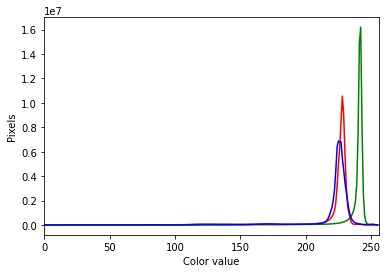

In [12]:
colors = ("r", "g", "b")
channel_ids = (0, 1, 2)

# create the histogram plot, with three lines, one for
# each color
plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

plt.show()

In [20]:
img = cv2.imread('1.jpg')

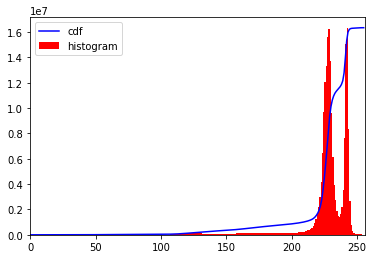

In [21]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

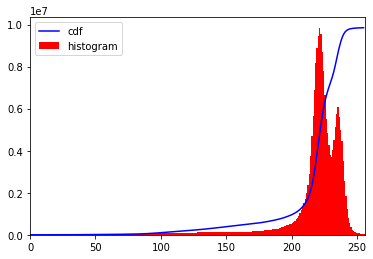

In [17]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [22]:
img = cv2.imread('CLAHE.jpg')

In [18]:
img = cv2.imread('test.jpg')

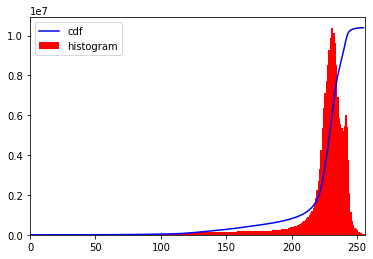

In [19]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [1]:
import numpy as np
import cv2

In [28]:
img1 = cv2.imread('1.jpg')

In [29]:
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)

In [5]:
img2 = cv2.imread('CLAHE.jpg')

In [6]:
img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

In [7]:
img3 = cv2.imread('out2.jpg')

In [8]:
img3 = cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)

In [9]:
cv2.imwrite('原图灰.jpg',img1)

True

In [10]:
cv2.imwrite('CLAHE灰.jpg',img2)

True

In [11]:
cv2.imwrite('out2灰.jpg',img3)

True

In [12]:
img1 = cv2.imread('1.jpg')

In [13]:
temp = cv2.split(img1)

In [15]:
cv2.imwrite('原图R.jpg',temp[2])

True

In [25]:
img1 = cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

In [26]:
cv2.imwrite('原图二值.jpg',img1)

TypeError: Expected Ptr<cv::UMat> for argument 'img'

In [22]:
cv2.imshow(img1)

TypeError: imshow() missing required argument 'mat' (pos 2)

In [30]:
cv2.threshold(img1,127,255,cv2.THRESH_BINARY)

(127.0,
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [54]:
img1 = cv2.imread('1.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
out = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

In [55]:
cv2.imwrite('img.jpg',out)

True

In [58]:
img1 = cv2.imread('out.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
out = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
cv2.imwrite('out-.jpg',out)

True

In [57]:
img1 = cv2.imread('CLAHE.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
out = cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
cv2.imwrite('CLAHE-.jpg',out)

True

# Global

## 0. Origin Image Histogram

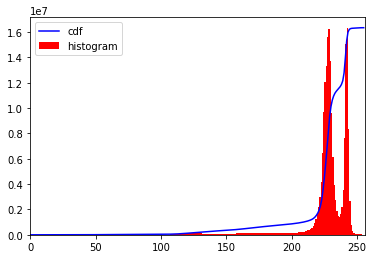

In [9]:
import cv2
import numpy as np
import sys
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt
img = cv2.imread('1.jpg')
hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## 1. BBHE

In [2]:
from image_enhancement import image_enhancement
import cv2
import numpy as np
img = cv2.imread('1.jpg')

In [3]:
ie = image_enhancement.IE(img, color_space = 'HSV')

In [5]:
result = ie.BBHE()

In [6]:
cv2.imwrite('BBHE.jpg',result)

True

/Users/ling/miniconda3/lib/python3.9/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


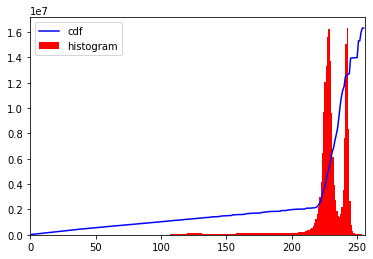

In [8]:
import sys
import skimage.io
import skimage.viewer
from matplotlib import pyplot as plt
hist,bins = np.histogram(result.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [10]:
diff = cv2.subtract(img,result)

In [11]:
diff

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)